In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import os
import mmcv
import importlib
import torch
import torchvision.transforms as transforms
from mmcv import Config
from mmcls.datasets.pipelines import Compose
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec
from PIL import Image
import heapq
from mmseg.apis import inference_segmentor, init_segmentor
from mmseg.core.evaluation import get_palette
from pytorch_grad_cam.utils.image import show_cam_on_image
import cv2

import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    

from scripts import generate_statistics_single
from scripts import visualization_seg_masks
from scripts import generate_statistics
from scripts import generate_cams
from scripts import utils
from scripts.utils.pipeline import get_pipeline_torchvision
from scripts import generate_segs

In [2]:
configSeg = '../segmentation/ocrnet_hr48_512x512_carparts_noflip/ocrnet_hr48_512x512_carparts_noflip.py'
checkpointSeg = '../segmentation/ocrnet_hr48_512x512_carparts_noflip/latest.pth'
imgRootTrain = '../data/CompCars_sv_original_split/train'
imgRootVal = '../data/CompCars_sv_original_split/val'
configCAM = '../CAMModels/resnet/compCars_Original/resnet50_b128x2_compcars-original-split.py'
checkpointCAM = '../CAMModels/resnet/compCars_Original/latest.pth'
annfileTrain = '../annfileTrain.txt'
annfileVal = '../annfileVal.txt'
annfileValGt = '../annfileValGt.txt'
imgNameTrain='Acura_Acura_ILX_2a6cce617fc27d.jpg'
imgNameVal = 'Acura_Acura_ILX_3c11ef9e42931b.jpg'
imgPathTrain=os.path.join(imgRootTrain, imgNameTrain)
imgPathVal=os.path.join(imgRootVal, imgNameVal)

paletteName='Comp_Original_Ocrnet_Carparts_Noflip'

Calculating segmentation results for batch 0
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 1/1, 0.3 task/s, elapsed: 4s, ETA:     0sGenerate Results for file: ../data/CompCars_sv_original_split/train\Acura_Acura_ILX_2a6cce617fc27d.jpg
Method for CAM generation: gradcam, eigen-smooth:False, aug-smooth:False, vit-like:False
Generate Results for specified files
Automatically choose the last norm layer as target_layer.
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 1/1, 4.0 task/s, elapsed: 0s, ETA:     0sOutput path is not a directory. Using base directory: ./results.
Saving images to: ./results\Overview.jpg


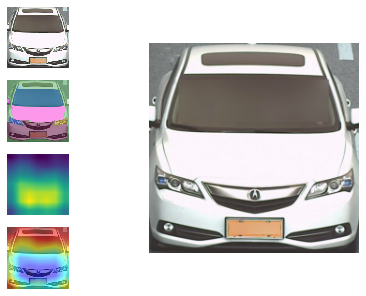

In [9]:
generate_statistics_single.plot(imgName=imgNameTrain, imgRoot=imgRootTrain, camConfig=configCAM,
                                camCheckpoint=checkpointCAM, segConfig=configSeg, segCheckpoint=checkpointSeg)

Calculating segmentation results for batch 0
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 1/1, 0.3 task/s, elapsed: 4s, ETA:     0sGenerate Results for file: ../data/CompCars_sv_original_split/train\Acura_Acura_ILX_2a6cce617fc27d.jpg
Method for CAM generation: gradcam, eigen-smooth:False, aug-smooth:False, vit-like:False
Generate Results for specified files
Automatically choose the last norm layer as target_layer.
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 1/1, 4.1 task/s, elapsed: 0s, ETA:     0sOutput path is not a directory. Using base directory: ./results.
Saving images to: ./results\Single_gradcam_CompCarsOriginal_ResNet_HRNet_CarPartsDataset_24_07_2022.png


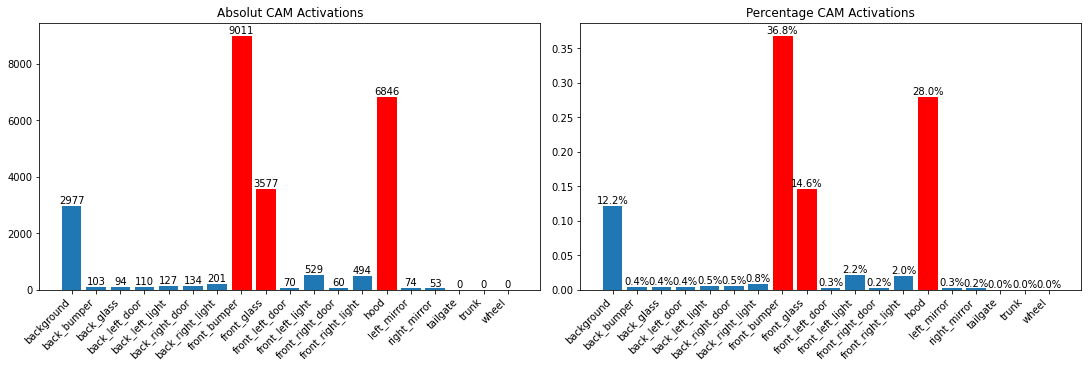

In [10]:
generate_statistics_single.generate_bar_cam_intersection(imgName=imgNameTrain,
                                                         imgRoot=imgRootTrain, camConfig=configCAM, 
                                                         camCheckpoint=checkpointCAM, segConfig=configSeg,
                                                         segCheckpoint=checkpointSeg)

Calculating segmentation results for batch 0
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 1/1, 0.3 task/s, elapsed: 4s, ETA:     0sGenerate Results for file: ../data/CompCars_sv_original_split/train\Acura_Acura_ILX_2a6cce617fc27d.jpg
Method for CAM generation: gradcam, eigen-smooth:False, aug-smooth:False, vit-like:False
Generate Results for specified files
Automatically choose the last norm layer as target_layer.
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 1/1, 4.0 task/s, elapsed: 0s, ETA:     0sOutput path is not a directory. Using base directory: ./results.
Saving images to: ./results\Single_gradcam_CompCarsOriginal_ResNet_HRNet_CarPartsDataset_ShowPropArea_24_07_2022.png


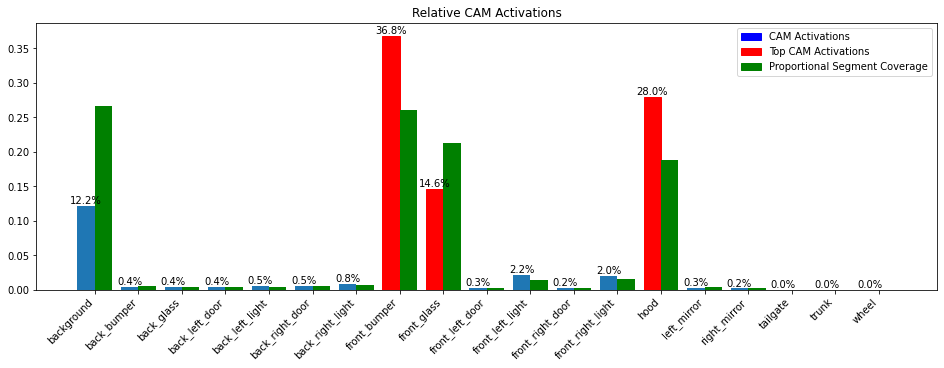

In [11]:
generate_statistics_single.generate_bar_cam_intersection_prop_area(imgName=imgNameTrain,
                                                         imgRoot=imgRootTrain, camConfig=configCAM, 
                                                         camCheckpoint=checkpointCAM, segConfig=configSeg,
                                                         segCheckpoint=checkpointSeg)

Calculating segmentation results for batch 0
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 1/1, 0.3 task/s, elapsed: 4s, ETA:     0sGenerate Results for file: ../data/CompCars_sv_original_split/train\Acura_Acura_ILX_2a6cce617fc27d.jpg
Method for CAM generation: gradcam, eigen-smooth:False, aug-smooth:False, vit-like:False
Generate Results for specified files
Automatically choose the last norm layer as target_layer.
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 1/1, 4.0 task/s, elapsed: 0s, ETA:     0sOutput path is not a directory. Using base directory: ./results.
Saving images to: ./results\Single_gradcam_CompCarsOriginal_ResNet_HRNet_CarPartsDataset_ShowPropArea_24_07_2022.png


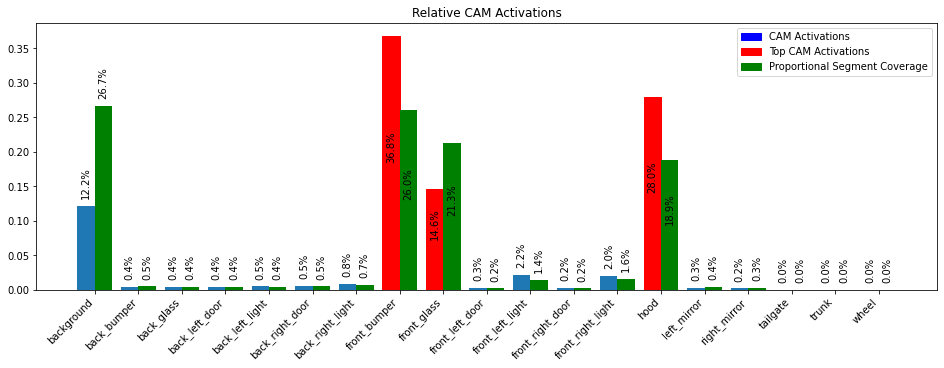

In [12]:
generate_statistics_single.generate_bar_cam_intersection_prop_area(imgName=imgNameTrain,
                                                         imgRoot=imgRootTrain, camConfig=configCAM, 
                                                         camCheckpoint=checkpointCAM, segConfig=configSeg,
                                                         segCheckpoint=checkpointSeg, showPropPercent=True)

Calculating segmentation results for batch 0
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 3/3, 0.7 task/s, elapsed: 4s, ETA:     0sMethod for CAM generation: gradcam, eigen-smooth:False, aug-smooth:False, vit-like:False
Generate Results for specified files
Automatically choose the last norm layer as target_layer.
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 3/3, 3.7 task/s, elapsed: 1s, ETA:     0sTranforming segmentation masks with the given pipeline.
Generating data for Batch 1
Data generated.
Output path is not a directory. Using base directory: ./results.
Saving images to: ./results\Multiple_classes+annfile_gradcam_CompCarsOriginal_ResNet_HRNet_CarPartsDataset_24_07_2022.png
Copying file from ../annfileTrain.txt to ./results/annfiles\Multiple_classes+annfile_gradcam_CompCarsOriginal_ResNet_HRNet_CarPartsDataset_24_07_2022.txt
Writing data to file at ./results/dataClasses\Multiple_classes+annfile_gradcam_CompCarsOriginal_ResNet_HRNet_CarPartsDataset_24_07_2022.png


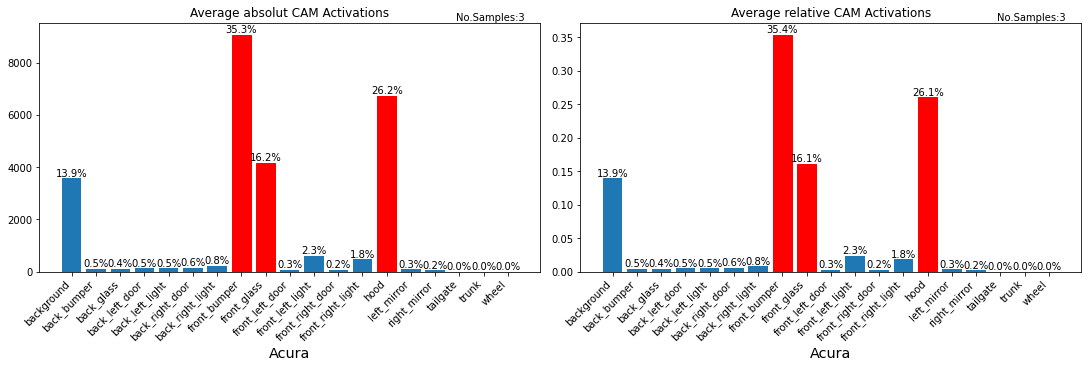

In [15]:
generate_statistics.generate_statistic(imgRoot=imgRootTrain, camConfig=configCAM, camCheckpoint=checkpointCAM, segConfig=configSeg,
                       segCheckpoint=checkpointSeg, annfile=annfileTrain, dataClasses=['Acura'])

Calculating segmentation results for batch 0
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 3/3, 0.7 task/s, elapsed: 4s, ETA:     0sMethod for CAM generation: gradcam, eigen-smooth:False, aug-smooth:False, vit-like:False
Generate Results for specified files
Automatically choose the last norm layer as target_layer.
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 3/3, 3.7 task/s, elapsed: 1s, ETA:     0sTranforming segmentation masks with the given pipeline.
Generating data for Batch 1
Data generated.
Output path is not a directory. Using base directory: ./results.
Saving images to: ./results\Multiple_classes+annfile_gradcam_CompCarsOriginal_ResNet_HRNet_CarPartsDataset_24_07_2022.png
Copying file from ../annfileTrain.txt to ./results/annfiles\Multiple_classes+annfile_gradcam_CompCarsOriginal_ResNet_HRNet_CarPartsDataset_24_07_2022.txt
Writing data to file at ./results/dataClasses\Multiple_classes+annfile_gradcam_CompCarsOriginal_ResNet_HRNet_CarPartsDataset_24_07_2022.png


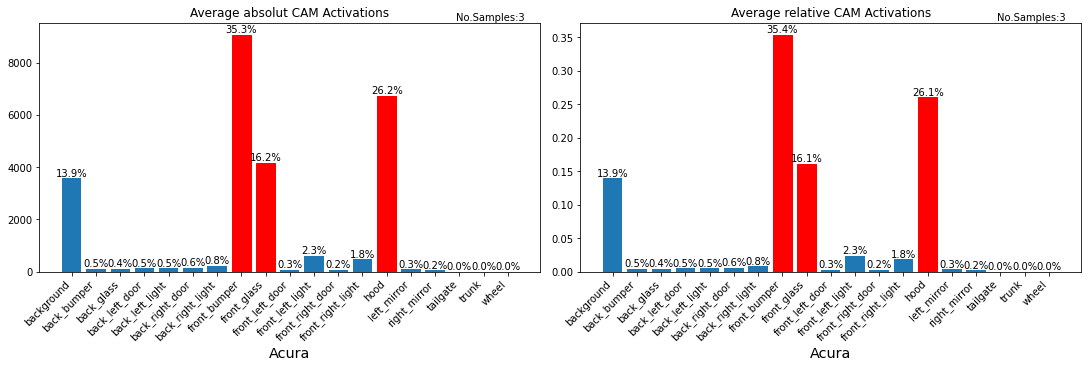

In [17]:
generate_statistics.generate_statistic(imgRoot=imgRootTrain, camConfig=configCAM, camCheckpoint=checkpointCAM, segConfig=configSeg,
                       segCheckpoint=checkpointSeg, annfile=annfileTrain, dataClasses=['Acura'])

load checkpoint from local path: ../segmentation/ocrnet_hr48_512x512_carparts_noflip/latest.pth
load checkpoint from local path: ../segmentation/ocrnet_hr48_512x512_carparts_noflip/latest.pth
Calculating segmentation results for batch 0
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 3/3, 0.7 task/s, elapsed: 4s, ETA:     0sGenerate Results for specified files
load checkpoint from local path: ../CAMModels/resnet/compCars_Original/latest.pth
Automatically choose the last norm layer as target_layer.
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 3/3, 3.2 task/s, elapsed: 1s, ETA:     0sload checkpoint from local path: ../segmentation/ocrnet_hr48_512x512_carparts_noflip/latest.pth
Generating data for Batch 1
Data generated.
Output path is not a directory. Using base directory: ./results.
Saving images to: ./results\Multiple_classes+annfile_gradcam_ShowPropArea_21_07_2022.png
Copying file from ../annfile.txt to ./results/annfiles\Multiple_classes+annfile_gradcam_ShowPropArea_21_07_2022.txt
Writing data to fi

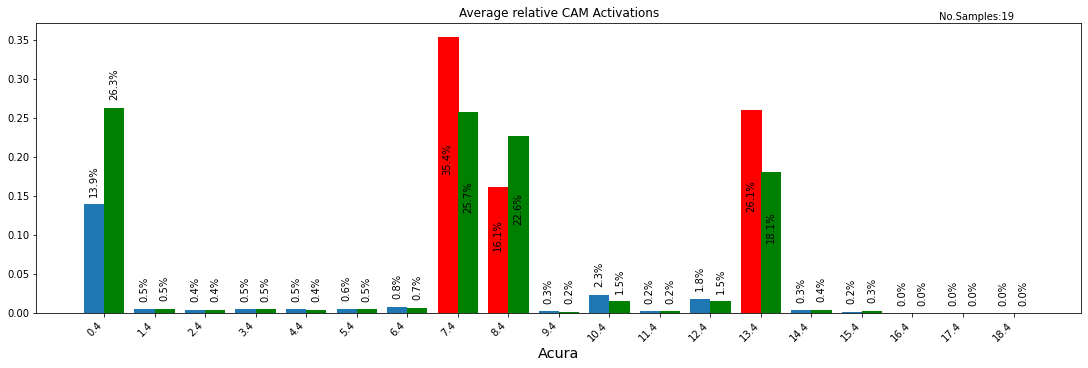

In [29]:
generate_statistics.generate_statistic_prop(imgRoot=imgRootTrain, camConfig=configCAM, camCheckpoint=checkpointCAM, 
                                            segConfig=configSeg, segCheckpoint=checkpointSeg, annfile=annfileTrain,
                                            dataClasses=['Acura'], showPropPercent=True)

In [3]:
generate_segs.main([imgRootVal, configSeg, checkpointSeg, '-s', 'fullScaled','--pipeline', 'post', configCAM])

Saving resulting segmentation masks in ./output/
Loading Pipeline from Config ../CAMModels/resnet/compCars_Original/resnet50_b128x2_compcars-original-split.py
Calculating segmentation results.
[>>>>>>>>>>>>>>>>>>>>>>>>] 13333/13333, 5.9 task/s, elapsed: 2269s, ETA:     0s
Saving results at ./output/fullScaled.npz


Calculating segmentation results for batch 0
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 3/3, 0.7 task/s, elapsed: 4s, ETA:     0sGenerate Results for specified files
Automatically choose the last norm layer as target_layer.
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 3/3, 3.7 task/s, elapsed: 1s, ETA:     0sTranforming segmentation masks with the given pipeline.
Compose(
    Lambda()
    ToPILImage()
    Resize(size=(256,), interpolation=bilinear, max_size=None, antialias=None)
    CenterCrop(size=(224, 224))
    ToTensor()
    <function get_pipeline_torchvision.<locals>.<lambda> at 0x0000018D104CD3F0>
    <function get_pipeline_torchvision.<locals>.<lambda> at 0x0000018D104CDBD0>
)
Generating data for Batch 1
Data generated.
Output path is not a directory. Using base directory: ./results.
Saving images to: ./results\Multiple_classes+annfile_gradcam_CompCarsOriginal_ResNet_HRNet_CarPartsDataset_ShowPropArea_23_07_2022.png
Copying file from ../annfileTrain.txt to ./results/annfiles\Multiple_classe

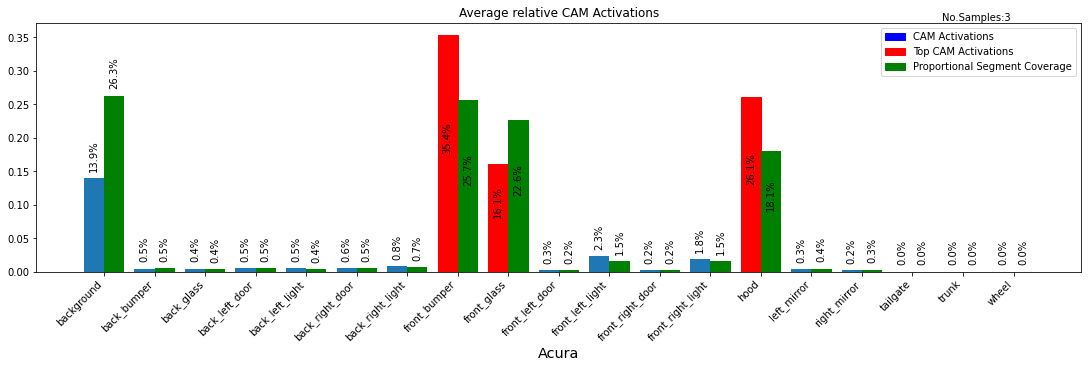

In [9]:
generate_statistics.generate_statistic_prop(imgRoot=imgRootTrain, camConfig=configCAM, camCheckpoint=checkpointCAM, 
                                            segConfig=configSeg, segCheckpoint=checkpointSeg, annfile=annfileTrain,
                                            dataClasses=['Acura'], showPropPercent=True)

In [3]:
generate_cams.main([imgRootVal, configCAM, checkpointCAM, '-s', 'vallAllCAMsGrad++', '--method', 'gradcam++'])

Method for CAM generation: gradcam++, eigen-smooth:False, aug-smooth:False, vit-like:False
Generate Results for specified files
Automatically choose the last norm layer as target_layer.
[>>>>>>>>>>>>>>>>>>>>>>>>] 13333/13333, 4.5 task/s, elapsed: 2961s, ETA:     0sSave generated CAMs to ./output/vallAllCAMsGrad++.npz


In [4]:
generate_cams.main([imgRootVal, configCAM, checkpointCAM, '-s', 'vallAllCAMsXGrad', '--method', 'xgradcam'])

Method for CAM generation: xgradcam, eigen-smooth:False, aug-smooth:False, vit-like:False
Generate Results for specified files
Automatically choose the last norm layer as target_layer.
[>>>>>>>>>>>>>>>>>>>>>>>>] 13333/13333, 4.7 task/s, elapsed: 2854s, ETA:     0sSave generated CAMs to ./output/vallAllCAMsXGrad.npz


In [5]:
generate_cams.main([imgRootVal, configCAM, checkpointCAM, '-s', 'vallAllCAMsEigen', '--method', 'eigencam'])

Method for CAM generation: eigencam, eigen-smooth:False, aug-smooth:False, vit-like:False
Generate Results for specified files
Automatically choose the last norm layer as target_layer.
[>>>>>>>>>>>>>>>>>>>>>>>>] 13333/13333, 2.9 task/s, elapsed: 4669s, ETA:     0sSave generated CAMs to ./output/vallAllCAMsEigen.npz


In [3]:
generate_cams.main([imgRootVal, configCAM, checkpointCAM, '-s', 'vallAllCAMsEigenGrad', '--method', 'eigengradcam'])

Method for CAM generation: eigengradcam, eigen-smooth:False, aug-smooth:False, vit-like:False
Generate Results for specified files
Automatically choose the last norm layer as target_layer.
[>>>>>>>>>>>>>>>>>>>>>>>>] 13333/13333, 2.2 task/s, elapsed: 6134s, ETA:     0sSave Split file for Cams
Save generated CAMs to ./output/vallAllCAMsEigenGrad.npz


In [3]:
generate_cams.main([imgRootVal, configCAM, checkpointCAM, '-s', 'vallAllCAMsLayer', '--method', 'layercam'])

Method for CAM generation: layercam, eigen-smooth:False, aug-smooth:False, vit-like:False
Generate Results for specified files
Automatically choose the last norm layer as target_layer.
[>>>>>>>>>>>>>>>>>>>>>>>>] 13333/13333, 4.6 task/s, elapsed: 2886s, ETA:     0sSave Split file for Cams
Save generated CAMs to ./output/vallAllCAMsLayer.npz


In [4]:
generate_cams.main([imgRootVal, configCAM, checkpointCAM, '-s', 'vallAllCAMsGPU', '--device', 'cuda'])

Method for CAM generation: GradCAM, eigen-smooth:False, aug-smooth:False, vit-like:False
Generate Results for specified files
Automatically choose the last norm layer as target_layer.
[>>>>>>>>>>>>>>>>>>>>>>>>] 13333/13333, 15.3 task/s, elapsed: 872s, ETA:     0sSave Split file for Cams
Save generated CAMs to ./output/vallAllCAMsGPU.npz


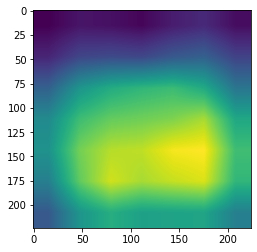

In [11]:
plt.imshow(r['Acura_Acura_ILX_3c11ef9e42931b.jpg'])

In [5]:
j = generate_cams.main([imgPathVal, configCAM, checkpointCAM, '-r', '--target-category', '10'])

Generate Results for file: ../data/CompCars_sv_original_split/val\Acura_Acura_ILX_3c11ef9e42931b.jpg
Method for CAM generation: GradCAM, eigen-smooth:False, aug-smooth:False, vit-like:False
Generate Results for specified files
Automatically choose the last norm layer as target_layer.
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 1/1, 4.0 task/s, elapsed: 0s, ETA:     0s

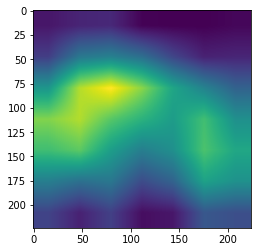

In [6]:
plt.imshow(j['Acura_Acura_ILX_3c11ef9e42931b.jpg'])

In [7]:
r = generate_cams.main([imgRootVal, configCAM, checkpointCAM, '-r', '--ann-file', annfileValGt, '--use-ann-labels'])

Method for CAM generation: GradCAM, eigen-smooth:False, aug-smooth:False, vit-like:False
Using annotation labels provided by the annfile.
Generate Results for specified files
Automatically choose the last norm layer as target_layer.
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 4/4, 3.8 task/s, elapsed: 1s, ETA:     0s

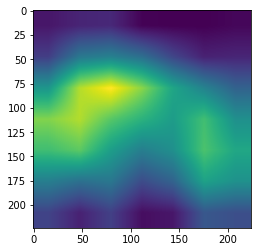

In [8]:
plt.imshow(r['Acura_Acura_ILX_3c11ef9e42931b.jpg'])

Using given Segmentation Data.
Loading data from file at ./output/valAllSeg.npz
Using given CAM Data.
Loading data from file at ./output/valAllCAMS.npz


C:\Users\Linus\Desktop\XAI-Vehicle-Classification\scripts\utils\prepareData.py:101: UserWarning: No pipeline is applied since segData is provided. If pipeline should be applied specify by pipelineCfg parameter.
  warnings.warn('No pipeline is applied since segData is provided. If pipeline should be applied specify '
C:\Users\Linus\Desktop\XAI-Vehicle-Classification\scripts\utils\preprocessing.py:56: UserWarning: Statistics computed over 18 items. Reverting to using batches of size 10 to avoid overflows. Can be overriden by using forceAll=True
  'to avoid overflows. Can be overriden by using forceAll=True')


Generating data for Batch 1
Generating data for Batch 2
Data generated.
Output path is not a directory. Using base directory: ./results.
Saving images to: ./results\Multiple_classes_CAM-Predefined_CAM-Predefined_CAM-Predefined_SEG-Predefined_SEG-Predefined_06_08_2022.png
Writing data to file at ./results/dataClasses\Multiple_classes_CAM-Predefined_CAM-Predefined_CAM-Predefined_SEG-Predefined_SEG-Predefined_06_08_2022.png


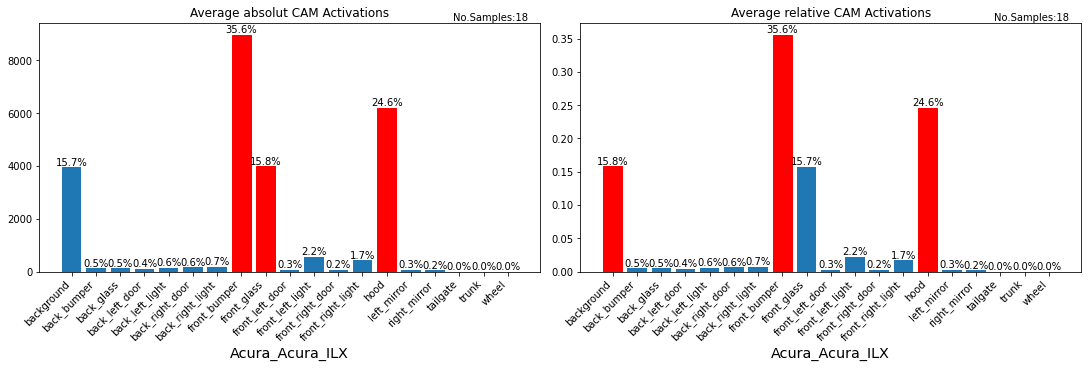

In [36]:
generate_statistics.generate_statistic(imgRoot=imgRootVal, camData='./output/valAllCAMS.npz', segConfig=configSeg,
                       segCheckpoint=checkpointSeg, segData='./output/valAllSeg.npz', dataClasses=['Acura_Acura_ILX'])